# Competition Description

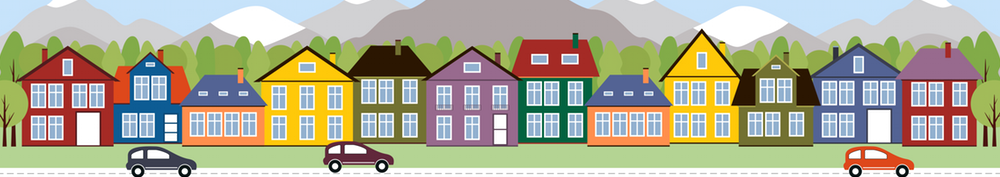

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Data load

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/colab_notebooks/house-prices-kaggle/data/train.csv')#.reset_index(drop=True)
df_test = pd.read_csv('/content/drive/MyDrive/colab_notebooks/house-prices-kaggle/data/test.csv')#, index_col=0).reset_index(drop=True)

In [3]:
df = df_train.copy()

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

Model building for features importance analysis and preliminary score

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
cat_features = ['MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [10]:
df_train[cat_features] = df_train[cat_features].fillna('No value')

In [11]:
RANDOM = 22
labels = ['SalePrice']

In [12]:
X = df_train.drop(labels=labels, axis=1)
y = df_train[labels]

In [13]:
!pip install -q catboost
from catboost import CatBoostRegressor, Pool, cv

     |████████████████████████████████| 76.1 MB 53 kB/s 


In [14]:
pool = Pool(X, y, cat_features=cat_features)

In [15]:
params = {'loss_function': 'RMSE',
          # 'iterations': 10000,
          'logging_level': 'Silent',
          'eval_metric':'RMSE',
          'cat_features': cat_features,
          'learning_rate': 0.03,
          'random_seed': RANDOM,
          'early_stopping_rounds': 200,
          # 'verbose': 200
          }

In [16]:
model = CatBoostRegressor(**params)

In [17]:
model.fit(pool)

In [18]:
feature_importance = pd.DataFrame({'feature_importance': model.get_feature_importance(data=pool), 
                                   'feature_names': X.columns}
                                  ).sort_values(by=['feature_importance'], ascending=False).head(20)

In [19]:
import plotly.graph_objs as go

In [20]:
data = go.Bar(x=feature_importance['feature_names'],
               y=feature_importance['feature_importance'],
       )
layout = {'title': 'feature_importance',
          'width': 900,
          'height': 500,
          }
    
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(tickangle=35)
fig.show()

In [21]:
!pip install -q shap
import shap

     |████████████████████████████████| 564 kB 4.1 MB/s 


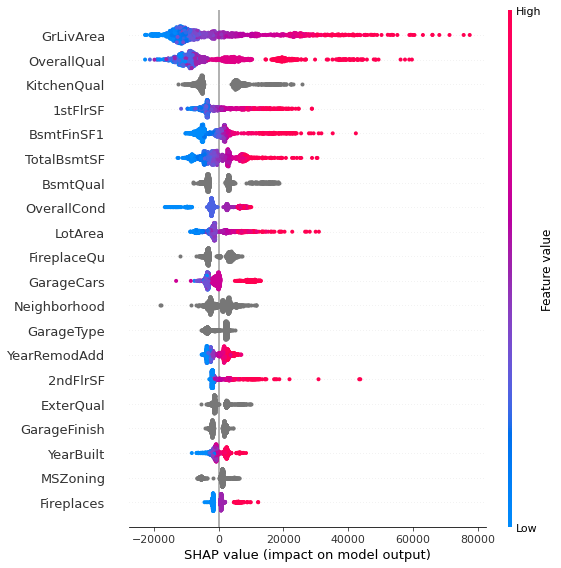

In [22]:
shap_values = model.get_feature_importance(pool,type="ShapValues")
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
shap.summary_plot(shap_values, X)

The most important features are:
- `GrLivArea`: Above grade (ground) living area square feet
- `OverallQual`: Rates the overall material and finish of the house

### NaN checking

#### Checking df_train

In [23]:
df_train = df.copy()

In [24]:
df_train.isna().mean().sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

- `PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage` - NaN means no value
- `GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual` - NaN means there is no garage in the property
- `BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1` - NaN means there is no basement in the property
- in another columns there isn't many NaN and they not in the list of important features, so it is better not fill by predicted values

For catboost model it is no need to fill NaN for non-categorical features if it means no value

In [25]:
# только с этим модель улучшается, но раз не заполнять ничего, так ничего
# df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].value_counts().index[0])

#### Checking df_test

In [26]:
df_test.isna().mean().sort_values(ascending=False).head(40)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageCond      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
BsmtFullBath    0.001371
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
TotalBsmtSF     0.000685
Exterior2nd     0.000685
GarageCars      0.000685
Exterior1st     0.000685
GarageArea      0.000685
SaleType        0.000685
MiscVal         0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
YrSold          0.000000
TotRmsAbvGrd    0.000000
MoSold          0.000000
Fireplaces      0.000000


- `PoolQC, MiscFeature, Alley, Fence, FireplaceQu` - NaN means no value
- `GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual` - NaN means there is no garage in the property
- `BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1` - NaN means there is no basement in the property

Using `phik` to analyze feature relations

In [27]:
!pip install -q phik
import phik

     |████████████████████████████████| 675 kB 2.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [28]:
phik_matrix = df_train.phik_matrix()

interval columns not set, guessing: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [29]:
phik_matrix['LotFrontage'].sort_values(ascending=False).head(10)

LotFrontage     1.000000
TotalBsmtSF     0.710507
RoofMatl        0.693939
GrLivArea       0.591745
PoolQC          0.556428
1stFlrSF        0.553381
Neighborhood    0.512605
BsmtFinSF1      0.504822
PoolArea        0.496424
GarageArea      0.473361
Name: LotFrontage, dtype: float64

In [30]:
# df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['TotalBsmtSF'] / median_temp).astype('int')

NaN in `LotFrontage` were filled in by dividing on median value of TotalBsmtSF/LotFrontage

In [31]:
df_test.groupby(['PoolQC', 'MasVnrType'], dropna=False)['MasVnrType'].agg(['count'])

count
PoolQC MasVnrType       
Ex     None            1
       Stone           1
Gd     BrkFace         1
NaN    BrkCmn         10
       BrkFace       433
       None          877
       Stone         120
       NaN             0

In [32]:
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

NaN in `MasVnrType` were filled in by None and `MasVnrArea` by 0

In [33]:
df_test[df_test['MSZoning'].isna()]['Neighborhood']

455      IDOTRR
756      IDOTRR
790      IDOTRR
1444    Mitchel
Name: Neighborhood, dtype: object

In [34]:
df_test[df_test['Neighborhood'].isin(['IDOTRR', 'Mitchel'])].groupby(['Neighborhood', 'MSZoning'], dropna=False)['MSZoning'].agg(['count'])

count
Neighborhood MSZoning       
IDOTRR       C (all)      13
             RM           40
             NaN           0
Mitchel      RL           60
             RM            4
             NaN           0

In [35]:
cond = df_test['Neighborhood'] == 'IDOTRR'
df_test.loc[cond,'MSZoning'] = df_test.loc[cond,'MSZoning'].fillna('RM')

In [36]:
cond = df_test['Neighborhood'] == 'Mitchel'
df_test.loc[cond,'MSZoning'] = df_test.loc[cond,'MSZoning'].fillna('RL')

NaN in `MSZoning` were filled in by common values according to `Neighborhood`

In [37]:
df_test.groupby(['KitchenAbvGr', 'BsmtHalfBath'], dropna=False)['BsmtHalfBath'].agg(['count'])

count
KitchenAbvGr BsmtHalfBath       
0            1.0               1
             2.0               1
1            0.0            1300
             1.0              90
             2.0               1
             NaN               0
2            0.0              64

In [38]:
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0)

NaN in `BsmtHalfBath` were filled in by 0

In [39]:
df_test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [40]:
df_test['Utilities'] = df_test['Utilities'].fillna('AllPub')

NaN in `Utilities` were filled in by common values

In [41]:
df_test['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [42]:
df_test['Functional'] = df_test['Functional'].fillna('Typ')

NaN in `Functional` were filled in by common values

In [43]:
df_test.groupby(['PoolQC', 'BsmtFullBath'], dropna=False)['BsmtFullBath'].agg(['count'])

count
PoolQC BsmtFullBath       
Ex     0.0               1
       2.0               1
Gd     1.0               1
NaN    0.0             848
       1.0             583
       2.0              22
       3.0               1
       NaN               0

In [44]:
df_test.groupby(['BsmtFinSF1', 'BsmtFullBath'], dropna=False)['BsmtFullBath'].agg(['count'])

count
BsmtFinSF1 BsmtFullBath       
0.0        0.0             452
           1.0               9
           NaN               0
16.0       0.0               4
           2.0               1
...                        ...
2158.0     1.0               1
2257.0     2.0               1
2288.0     2.0               1
4010.0     1.0               1
NaN        NaN               0

[781 rows x 1 columns]

In [45]:
df_test[df_test['BsmtFullBath'].isna()][['PoolQC', 'BsmtFinSF1']]

,PoolQC,BsmtFinSF1
660,NaN,NaN
728,NaN,0.0


In [46]:
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)

NaN in `BsmtFullBath` and `BsmtFinSF1` were filled in by 0 according to `PoolQC` and `BsmtFinSF1`

In [47]:
df_test.groupby(['BsmtFinType2', 'BsmtFinSF2'], dropna=False)['BsmtFinSF2'].agg(['count'])

count
BsmtFinType2 BsmtFinSF2       
ALQ          42.0            1
             127.0           1
             136.0           1
             216.0           1
             247.0           1
...                        ...
Rec          1164.0          1
Unf          0.0          1236
             6.0             1
NaN          0.0            41
             NaN             0

[179 rows x 1 columns]

In [48]:
df_test[df_test['BsmtFinSF2'].isna()]['BsmtFinType2']

660    NaN
Name: BsmtFinType2, dtype: object

In [49]:
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(0)

NaN in `BsmtFinSF2` were filled in by 0 according to `BsmtFinType2`

In [50]:
df_test.groupby(['TotalBsmtSF', 'BsmtUnfSF'], dropna=False)['BsmtUnfSF'].agg(['count'])

,,count
TotalBsmtSF,BsmtUnfSF,
0.0,0.0,41
160.0,160.0,1
173.0,173.0,1
192.0,96.0,1
216.0,216.0,2
...,...,...
2630.0,342.0,1
2660.0,1559.0,1
2846.0,1473.0,1


In [51]:
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(0)
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)

NaN in `BsmtUnfSF` and `TotalBsmtSF` were filled in by 0 according to `PoolQC`

In [52]:
df_test.groupby(['ExterQual', 'KitchenQual'], dropna=False)['KitchenQual'].agg(['count'])

count
ExterQual KitchenQual       
Ex        Ex              51
          Gd               4
Fa        Ex               1
          Fa               3
          Gd               3
          TA              14
Gd        Ex              43
          Fa               1
          Gd             406
          TA              41
TA        Ex              10
          Fa              27
          Gd             152
          TA             702
          NaN              0

In [53]:
df_test[df_test['KitchenQual'].isna()]['ExterQual']

95    TA
Name: ExterQual, dtype: object

In [54]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA')

NaN in `KitchenQual` were filled in by TA according to `ExterQual`

In [55]:
df_test[df_test['Neighborhood'] == 'Edwards'].groupby(['Neighborhood', 'Exterior1st', 'Exterior2nd'], dropna=False)[['Exterior1st', 'Exterior2nd']].agg(['count'])

Exterior1st Exterior2nd
                                           count       count
Neighborhood Exterior1st Exterior2nd                        
Edwards      AsbShng     AsbShng               2           2
                         Plywood               2           2
             BrkFace     Plywood               1           1
                         Wd Sdng               2           2
             CemntBd     CmentBd               1           1
             HdBoard     HdBoard               8           8
                         Plywood               4           4
                         Stucco                1           1
             MetalSd     MetalSd              14          14
             Plywood     Plywood              10          10
                         Wd Shng               1           1
             VinylSd     VinylSd              17          17
                         Wd Sdng               1           1
             Wd Sdng     Plywood               1           1
                         Wd Sdng              21          21
             WdShing     Plywood               2           2
                         Wd Shng               5           5
             NaN         NaN                   0           0

In [56]:
df_test['Exterior1st'] = df_test['Exterior1st'].fillna('Wd Sdng')
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna('Wd Sdng')

NaN in `Exterior1st` and `Exterior2nd` were filled in by Wd Sdng according to `Neighborhood`

In [57]:
df_test[df_test['GarageArea'].isna()]['GarageYrBlt']

1116   NaN
Name: GarageYrBlt, dtype: float64

In [58]:
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)

NaN in `GarageArea` and `GarageCars` were filled in by 0 according to `GarageYrBlt`

In [59]:
df_test.groupby(['SaleCondition', 'SaleType'], dropna=False)['SaleType'].agg(['count'])

count
SaleCondition SaleType       
Abnorml       COD          22
              ConLD         1
              ConLI         1
              Oth           2
              WD           63
AdjLand       WD            8
Alloca        WD           12
Family        COD           2
              ConLD         1
              ConLI         2
              ConLw         1
              Oth           1
              WD           19
Normal        COD          20
              CWD           8
              Con           2
              ConLD        15
              ConLI         1
              ConLw         2
              Oth           1
              WD         1154
              NaN           0
Partial       Con           1
              New         117
              WD            2

In [60]:
df_test['SaleType'] = df_test['SaleType'].fillna('WD')

NaN in `SaleType` were filled in by WD according to `SaleCondition`

# Checking unique values

In [61]:
unique_values_train = pd.DataFrame(
    [
     [col, # col name from cat_features
      sorted(df_train[col].dropna().unique()), # sorted unique values
      [x for x in df_train[col].unique() if not(x in df_train[col].unique())] # non unique values (and NaN)
      ]for col in cat_features
     ],
    columns=['column', 'unique_values_train', 'NaN']
)

In [62]:
unique_values_test = pd.DataFrame(
    [
     [col, sorted(df_test[col].dropna().unique()),
      [x for x in df_test[col].unique() if not(x in df_test[col].unique())]
      ]for col in cat_features
     ],
    columns=['column', 'unique_values_test', 'NaN']
)

In [63]:
unique_values = unique_values_train.merge(unique_values_test, on='column')
unique_values['is_differ'] = unique_values['unique_values_test'] != (unique_values['unique_values_train'])

In [64]:
unique_values['C'] = [[z for z in y if z in x ] for x , y in zip(unique_values['unique_values_train'], unique_values['unique_values_test'])]

In [65]:
# in no NaN in column
df_train = df_train[df_train['Utilities'] == 'AllPub']
df_train = df_train[df_train['Condition2'].isin(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN'])]
df_train = df_train[df_train['HouseStyle'].isin(['1.5Fin', '1.5Unf', '1Story', '2.5Unf', '2Story', 'SFoyer', 'SLvl'])]
df_train = df_train[df_train['RoofMatl'].isin(['CompShg', 'Tar&Grv', 'WdShake', 'WdShngl'])]
df_train = df_train[df_train['Exterior1st'].isin(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'MetalSd', 'Plywood', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'])]
df_train = df_train[df_train['Exterior2nd'].isin(['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'])]
df_train = df_train[df_train['Heating'].isin(['GasA', 'GasW', 'Grav', 'Wall'])]

In [66]:
df_train.shape

(1436, 81)

In [67]:
unique_values.style

,column,unique_values_train,NaN_x,unique_values_test,NaN_y,is_differ,C
0,MSZoning,"['C (all)', 'FV', 'RH', 'RL', 'RM']",[],"['C (all)', 'FV', 'RH', 'RL', 'RM']",[],False,"['C (all)', 'FV', 'RH', 'RL', 'RM']"
1,Street,"['Grvl', 'Pave']",[],"['Grvl', 'Pave']",[],False,"['Grvl', 'Pave']"
2,Alley,"['Grvl', 'Pave']",[nan],"['Grvl', 'Pave']",[nan],False,"['Grvl', 'Pave']"
3,LotShape,"['IR1', 'IR2', 'IR3', 'Reg']",[],"['IR1', 'IR2', 'IR3', 'Reg']",[],False,"['IR1', 'IR2', 'IR3', 'Reg']"
4,LandContour,"['Bnk', 'HLS', 'Low', 'Lvl']",[],"['Bnk', 'HLS', 'Low', 'Lvl']",[],False,"['Bnk', 'HLS', 'Low', 'Lvl']"
5,Utilities,"['AllPub', 'NoSeWa']",[],['AllPub'],[],True,['AllPub']
6,LotConfig,"['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']",[],"['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']",[],False,"['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']"
7,LandSlope,"['Gtl', 'Mod', 'Sev']",[],"['Gtl', 'Mod', 'Sev']",[],False,"['Gtl', 'Mod', 'Sev']"
8,Neighborhood,"['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']",[],"['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']",[],False,"['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']"
9,Condition1,"['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']",[],"['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']",[],False,"['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']"


# New model train

In [68]:
params = {'loss_function': 'RMSE',
          'iterations': 10000,
          'eval_metric':'RMSE',
          'cat_features': cat_features,
          'learning_rate': 0.03,
          'random_seed': RANDOM,
          'early_stopping_rounds': 200,
          'verbose': 200}

In [69]:
model = CatBoostRegressor(**params)

In [70]:
df_train[cat_features] = df_train[cat_features].fillna('No value')

In [71]:
X = df_train.drop(labels=labels, axis=1)
y = df_train[labels]

In [72]:
pool = Pool(X, y, cat_features=cat_features)

In [73]:
cv_data = cv(pool, params=model.get_params())

Training on fold [0/3]
0:	learn: 190896.2500116	test: 195602.4231347	best: 195602.4231347 (0)	total: 37ms	remaining: 6m 9s
200:	learn: 20017.0186188	test: 32250.5699460	best: 32250.5699460 (200)	total: 11.2s	remaining: 9m 5s
400:	learn: 14515.4676895	test: 30421.5120036	best: 30421.5120036 (400)	total: 26.5s	remaining: 10m 34s
600:	learn: 12028.9714722	test: 30035.5207623	best: 30016.5800881 (573)	total: 34s	remaining: 8m 52s
800:	learn: 10458.2959964	test: 29919.0817573	best: 29917.0322388 (789)	total: 40.8s	remaining: 7m 48s
1000:	learn: 9211.4733670	test: 29822.2455647	best: 29822.2455647 (1000)	total: 47.6s	remaining: 7m 7s
1200:	learn: 8113.7916678	test: 29758.1647517	best: 29755.9171483 (1196)	total: 54.5s	remaining: 6m 38s
1400:	learn: 7181.5949763	test: 29730.5236933	best: 29723.3821561 (1363)	total: 1m 1s	remaining: 6m 17s
1600:	learn: 6534.9864122	test: 29717.4671843	best: 29712.5642979 (1433)	total: 1m 16s	remaining: 6m 42s
1800:	learn: 5914.8480726	test: 29695.9737730	best:

In [90]:
cv_data['test-RMSE-mean'].min()

25467.587519588793

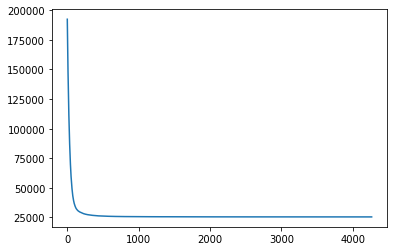

In [91]:
cv_data['test-RMSE-mean'].plot()

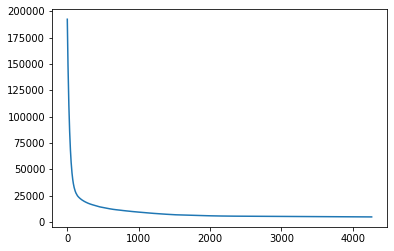

In [92]:
cv_data['train-RMSE-mean'].plot()

In [77]:
model.fit(pool)

0:	learn: 77708.2379776	total: 29.8ms	remaining: 4m 57s
200:	learn: 20106.1289570	total: 6.62s	remaining: 5m 22s
400:	learn: 16200.0737550	total: 13.1s	remaining: 5m 14s
600:	learn: 13815.1015356	total: 20s	remaining: 5m 12s
800:	learn: 12181.0735771	total: 27s	remaining: 5m 10s
1000:	learn: 10758.4354433	total: 33.8s	remaining: 5m 4s
1200:	learn: 9703.4832429	total: 40.7s	remaining: 4m 57s
1400:	learn: 8898.0493568	total: 47.5s	remaining: 4m 51s
1600:	learn: 8142.9063202	total: 54.4s	remaining: 4m 45s
1800:	learn: 7562.3447457	total: 1m 1s	remaining: 4m 38s
2000:	learn: 6984.1141471	total: 1m 7s	remaining: 4m 31s
2200:	learn: 6489.5096667	total: 1m 14s	remaining: 4m 25s
2400:	learn: 6027.7443854	total: 1m 21s	remaining: 4m 18s
2600:	learn: 5643.9012209	total: 1m 29s	remaining: 4m 14s
2800:	learn: 5296.2302401	total: 1m 38s	remaining: 4m 14s
3000:	learn: 4982.4065898	total: 1m 45s	remaining: 4m 6s
3200:	learn: 4682.0290303	total: 1m 52s	remaining: 3m 59s
3400:	learn: 4408.2779096	total

# Submission preparation

In [78]:
df_test[cat_features] = df_test[cat_features].fillna('No value')

In [79]:
df_test.drop(labels=cat_features, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtFinSF2     1459 non-null   float64
 11  BsmtUnfSF      1459 non-null   float64
 12  TotalBsmtSF    1459 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1459 non-null   float64
 18  BsmtHalf

In [80]:
df_test['SalePrice'] = model.predict(df_test)

In [84]:
df_test[['Id', 'SalePrice']].to_csv('/content/drive/MyDrive/colab_notebooks/house-prices-kaggle/data/submission.csv', index=False)